# Basic EDA

In [1]:
# basic data science toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import glob
import scipy.fft as fft

In [2]:
# reading in the data
columns = pd.read_csv('data/features2.txt', header = None)

X_train = pd.read_csv('data/Train/X_train.txt', names = columns[0], sep=' ')
X_test = pd.read_csv('data/Test/X_test.txt', names = columns[0], sep=' ')

y_train = pd.read_csv('data/Train/y_train.txt', sep=' ', header = None)
y_test = pd.read_csv('data/Test/y_test.txt', sep=' ', header = None)

---

## Basic Exploration

In [3]:
print(f'The X_train data set has {X_train.shape[0]} columns and {X_train.shape[1]} rows.')
print(f'The y_train data set has {y_train.shape[0]} columns and {y_train.shape[1]} rows.')
print(f'The X_test data set has {X_test.shape[0]} columns and {X_test.shape[1]} rows.')
print(f'The y_test data set has {y_test.shape[0]} columns and {y_test.shape[1]} rows.')

The X_train data set has 7767 columns and 561 rows.
The y_train data set has 7767 columns and 1 rows.
The X_test data set has 3162 columns and 561 rows.
The y_test data set has 3162 columns and 1 rows.


In [4]:
print(f'We have {X_train.isna().sum().sum()} missing values in the X_train data')
print(f'We have {y_train.isna().sum().sum()} missing values in the y_train data') 
print(f'We have {X_test.isna().sum().sum()} missing values in the X_test data') 
print(f'We have {y_test.isna().sum().sum()} missing values in the y_test data') 

We have 0 missing values in the X_train data
We have 0 missing values in the y_train data
We have 0 missing values in the X_test data
We have 0 missing values in the y_test data


Since we have such a large number of columns in our data, we should do some dimensionality reduction to visualize further. We'll be going forward with the two methods, PCA and t-SNE.

---

## PCA

In [5]:
# PCA with two components
pca = PCA()
pca.fit(X_train)

# transform data onto the first two principal components
X_train_PCA = pca.transform(X_train)

# Transform test data
X_test_PCA = pca.transform(X_test)

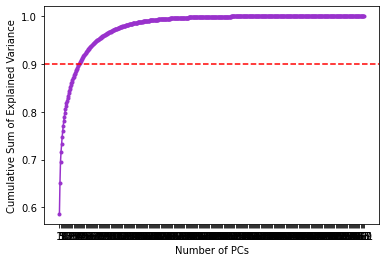

In [6]:
# Plot out the cumulative sum graph

cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, cumulative_sum.shape[0] + 1), cumulative_sum, marker='.', color = "darkorchid")
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1, cumulative_sum.shape[0] + 1, 2))
plt.show()

In [7]:
cumulative_sum >= 0.9

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [8]:
# index of first element at least 0.9
np.argmax(cumulative_sum >= 0.9)

37

In [9]:
cumulative_sum[36]

0.8998305066178731

In [10]:
# Instantiate and fit
pca = PCA(n_components = 37)
pca.fit(X_train)

# Transform train and test
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

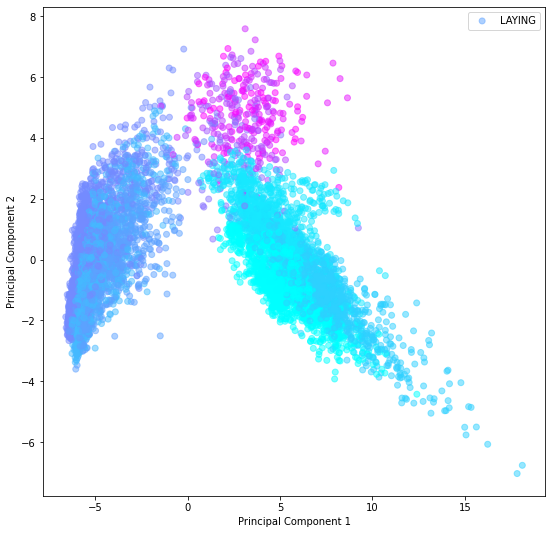

In [11]:
labels = ["LAYING", "STANDING", "SITTING", "WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]
# Plotting the PCA-transformed data (only the first two dimensions)
plt.figure(figsize=(9,9))
plt.scatter(X_train_PCA[:,0],X_train_PCA[:,1], c = y_train, cmap = 'cool', alpha = 0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend(labels = labels)

plt.show()

---

### t-SNE

In [12]:
# tSNE with two components
# Since the data is already scaled, we can use the data directly

tSNE = TSNE(n_components=2)

X_tSNE = tSNE.fit_transform(X_train)

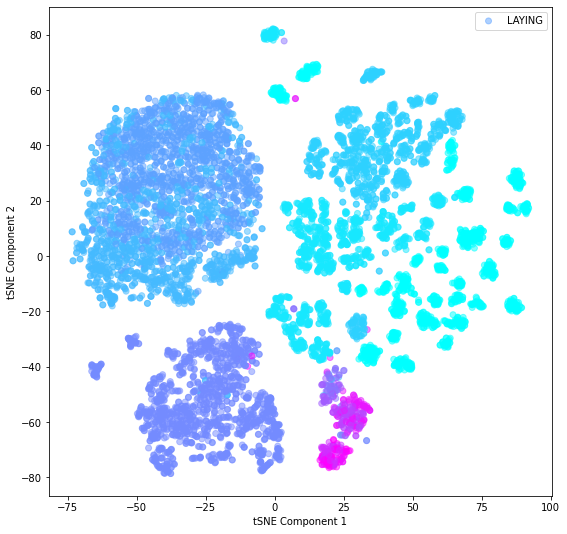

In [13]:
# Plotting the tSNE-transformed data (only the first two dimensions)

plt.figure(figsize=(9, 9))
plt.scatter(X_tSNE[:,0],X_tSNE[:,1], c = y_train, cmap='cool', alpha = 0.5)

plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

plt.legend(labels = labels)

plt.show()